In [50]:
import pandas as pd

In [51]:
dataf = pd.read_csv("../full_variants/mpraqtls.cagi.benchmarking.all.tsv", sep="\t", header=0)

In [52]:
dataf.head()

,var.chr_hg19,var.pos_hg19,var.allele1,var.allele2,obs.label,obs.confidence,pred.enformer.variantscore.local_sad,pred.enformer.variantscore.local_sar,pred.chrombpnet.variantscore.logfc,pred.chrombpnet.variantscore.jsd,...,pos_hg19,ref,alt,var.chr_hg38,var.pos_hg38,var.ref_hg38,var.alt_hg38,obs.label_hg38,Confidence_hg38,var.rsid
0,chr6,37775290,G,A,0.03,0.01,-0.021439,-0.025864,-0.184138,-0.041913,...,37775290,G,A,chr6,37807514,G,A,0.03,0.01,"6,37775290,G,A,0.03,0.01,challenge_ZFAND3.tsv"
1,chr6,37775290,G,C,0.03,0.01,-0.013206,-0.015869,-0.115516,-0.033420,...,37775290,G,C,chr6,37807514,G,C,0.03,0.01,"6,37775290,G,C,0.03,0.01,challenge_ZFAND3.tsv"
2,chr6,37775290,G,T,0.07,0.01,-0.022903,-0.027649,-0.138834,-0.049750,...,37775290,G,T,chr6,37807514,G,T,0.07,0.01,"6,37775290,G,T,0.07,0.01,challenge_ZFAND3.tsv"
3,chr6,37775291,T,A,-0.07,0.01,0.005508,0.006592,-0.000805,-0.032182,...,37775291,T,A,chr6,37807515,T,A,-0.07,0.01,"6,37775291,T,A,-0.07,0.01,challenge_ZFAND3.tsv"
4,chr6,37775291,T,C,0.03,0.01,0.028412,0.033691,0.107414,0.042707,...,37775291,T,C,chr6,37807515,T,C,0.03,0.01,"6,37775291,T,C,0.03,0.01,challenge_ZFAND3.tsv"


In [53]:
dataf.columns

Index(['var.chr_hg19', 'var.pos_hg19', 'var.allele1', 'var.allele2',
       'obs.label', 'obs.confidence', 'pred.enformer.variantscore.local_sad',
       'pred.enformer.variantscore.local_sar',
       'pred.chrombpnet.variantscore.logfc',
       'pred.chrombpnet.variantscore.jsd', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'obs.challenge',
       'obs.expt_encid', 'chr_hg19', 'pos_hg19', 'ref', 'alt', 'var.chr_hg38',
       'var.pos_hg38', 'var.ref_hg38', 'var.alt_hg38', 'obs.label_hg38',
       'Confidence_hg38', 'var.rsid'],
      dtype='object')

In [54]:
import numpy as np
dataf = dataf[~np.isnan(dataf["pred.enformer.variantscore.local_sad"])]

In [55]:
challenges = list(set(dataf["obs.challenge"]))

In [56]:
import scipy.stats
pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}
pear_dict_enf_sar = {}
for challenge in challenges:
    temp = dataf[dataf["obs.challenge"] == challenge]
    models = list(set(temp["obs.expt_encid"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    pear_dict_enf_sar[challenge] = []
    print(models)
    for model in models:
        if model=="ENCSR035RVH_keratinocyte":
            print(challenge)
            continue
        temp_new = temp[temp["obs.expt_encid"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)

        pear = scipy.stats.pearsonr(temp_new["obs.label"],temp_new['pred.chrombpnet.variantscore.logfc'])
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(temp_new["obs.label"],temp_new['pred.chrombpnet.variantscore.jsd'])
        pear_dict_jsd[challenge].append(pear)

        pear1 = scipy.stats.pearsonr(temp_new["obs.label"],temp_new["pred.enformer.variantscore.local_sad"])
        pear2 = scipy.stats.pearsonr(temp_new["obs.label"],temp_new["pred.enformer.variantscore.local_sar"])
        
        pear_dict_enf[challenge].append(pear1)
        pear_dict_enf_sar[challenge].append(pear2)



['ENCSR000EOT_K562']
['ENCSR000EJR_HEK293']
['ENCSR000EOT_K562']
['ENCSR149XIL_HEPG2']
['ENCSR000FEK_SK-MEL']
['ENCSR149XIL_HEPG2']
['ENCSR000EJR_HEK293']
['ENCSR000EOT_K562']
['ENCSR828FVZ_pancreas', 'ENCSR595HZQ_pancreas', 'ENCSR539WBA_pancreas', 'ENCSR464TKV_pancreas', 'ENCSR405YLV_pancreas']
['ENCSR000EOT_K562']
['ENCSR000EJR_HEK293']
['ENCSR149XIL_HEPG2']
['ENCSR724CND_keratinocyte', 'ENCSR000EPQ_keratinocyte']
['ENCSR000EJR_HEK293']


In [57]:
best_pear_logfc = []
best_pear_jsd = []
best_pear_sad = []
best_pear_sar = []
keys = list(pear_dict_jsd.keys())
for key in keys:
    best_pear_logfc.append(np.max(pear_dict_logfc[key]))
    best_pear_jsd.append(np.max(pear_dict_jsd[key]))    
    best_pear_sad.append(np.max(pear_dict_enf[key])) 
    best_pear_sar.append(np.max(pear_dict_enf_sar[key]))  

challenge_GP1BB.tsv (0.5233155319517283, 0.5632784392741983)
challenge_MYCrs6983267.tsv (0.508477059697288, 0.5271069007208296)
challenge_HBG1.tsv (0.5497457141072194, 0.17844376595518469)
challenge_SORT1.tsv (0.7622489179170531, 0.6128270356550973)
challenge_IRF4.tsv (0.8165519350021742, 0.6194705136131787)
challenge_F9.tsv (0.333298891870067, 0.28833966564695757)
challenge_TERT-HEK293T.tsv (0.5513406355044358, 0.5952787463573234)
challenge_HBB.tsv (0.5601838291960668, 0.5777343256266372)
challenge_ZFAND3.tsv (0.4518997677422695, 0.4842148015081688)
challenge_PKLR.tsv (0.8066711580652025, 0.7808898228177903)
challenge_HNF4A.tsv (0.383039666959116, 0.2882221742640615)
challenge_LDLR.tsv (0.5750109866204485, 0.5993377023399556)
challenge_IRF6.tsv (0.6910706773025032, 0.6589761892033787)
challenge_MSMB.tsv (0.22558972839140307, 0.09520784539427939)


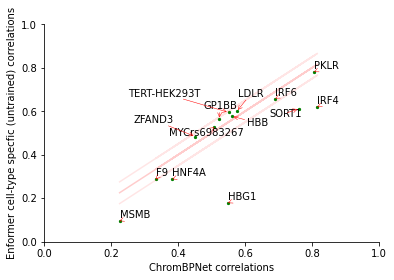

In [58]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sad, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

#plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

challenge_GP1BB.tsv (0.5233155319517283, 0.5624264864931722)
challenge_MYCrs6983267.tsv (0.508477059697288, 0.531071916776147)
challenge_HBG1.tsv (0.5497457141072194, 0.2306480685800073)
challenge_SORT1.tsv (0.7622489179170531, 0.6451592431151819)
challenge_IRF4.tsv (0.8165519350021742, 0.7144655925355718)
challenge_F9.tsv (0.333298891870067, 0.29587888379366384)
challenge_TERT-HEK293T.tsv (0.5513406355044358, 0.5844841342987368)
challenge_HBB.tsv (0.5601838291960668, 0.5963431617909264)
challenge_ZFAND3.tsv (0.4518997677422695, 0.49660231505400293)
challenge_PKLR.tsv (0.8066711580652025, 0.8131728750016707)
challenge_HNF4A.tsv (0.383039666959116, 0.28158864209788315)
challenge_LDLR.tsv (0.5750109866204485, 0.6400788914766323)
challenge_IRF6.tsv (0.6910706773025032, 0.6491011671352478)
challenge_MSMB.tsv (0.22558972839140307, 0.11747552572198068)


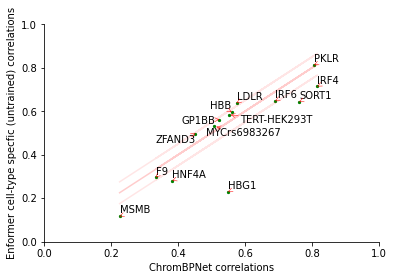

In [59]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sar, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sar[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sar[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

#plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

challenge_GP1BB.tsv (0.4128062253824977, 0.5632784392741983)
challenge_MYCrs6983267.tsv (0.49095913901091154, 0.5271069007208296)
challenge_HBG1.tsv (0.48795933551643184, 0.17844376595518469)
challenge_SORT1.tsv (0.681227732984946, 0.6128270356550973)
challenge_IRF4.tsv (0.6840828642566893, 0.6194705136131787)
challenge_F9.tsv (0.49351503474963176, 0.28833966564695757)
challenge_TERT-HEK293T.tsv (0.47367767284000123, 0.5952787463573234)
challenge_HBB.tsv (0.5728170171434538, 0.5777343256266372)
challenge_ZFAND3.tsv (0.38577836969276347, 0.4842148015081688)
challenge_PKLR.tsv (0.7722585085942911, 0.7808898228177903)
challenge_HNF4A.tsv (0.2968486288002167, 0.2882221742640615)
challenge_LDLR.tsv (0.5249068187686398, 0.5993377023399556)
challenge_IRF6.tsv (0.46590708035490297, 0.6589761892033787)
challenge_MSMB.tsv (0.24734936010483446, 0.09520784539427939)


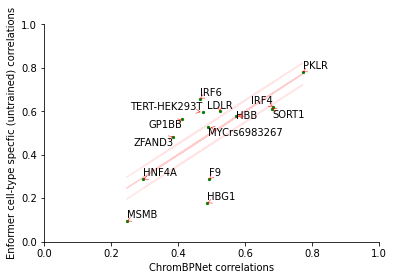

In [60]:

from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_jsd,best_pear_sad, s=5, c="g")
ax.plot(best_pear_jsd,best_pear_jsd, c="r",  alpha=0.2)
ax.plot(best_pear_jsd,np.array(best_pear_jsd)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_jsd,np.array(best_pear_jsd)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_jsd[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_jsd[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

#plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

In [61]:
import scipy.stats
pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}
pear_dict_enf_sar = {}
for challenge in challenges:
    temp = dataf[dataf["obs.challenge"] == challenge]
    models = list(set(temp["obs.expt_encid"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    pear_dict_enf_sar[challenge] = []
    for model in models:
        temp_new = temp[temp["obs.expt_encid"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)

#         pear = scipy.stats.pearsonr(temp_new["label"],temp_new["logfc.mean"])
#         pear_dict_logfc[challenge].append(pear)

#         pear = scipy.stats.pearsonr(temp_new["label"],temp_new["sign_jsd.mean"])
#         pear_dict_jsd[challenge].append(pear)

#         pear1 = scipy.stats.pearsonr(temp_new["label"],temp_new["SAD"])
#         pear2 = scipy.stats.pearsonr(temp_new["label"],temp_new["SAR"])
        
#         pear_dict_enf[challenge].append(pear1)
#         pear_dict_enf_sar[challenge].append(pear2)

        pear = scipy.stats.pearsonr(abs(temp_new["obs.label"]),abs(temp_new["pred.chrombpnet.variantscore.logfc"]))
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(abs(temp_new["obs.label"]),abs(temp_new["pred.chrombpnet.variantscore.jsd"]))
        pear_dict_jsd[challenge].append(pear)

        pear1 = scipy.stats.pearsonr(abs(temp_new["obs.label"]),abs(temp_new["pred.enformer.variantscore.local_sad"]))
        pear2 = scipy.stats.pearsonr(abs(temp_new["obs.label"]),abs(temp_new["pred.enformer.variantscore.local_sar"]))
        
        pear_dict_enf[challenge].append(pear1)
        pear_dict_enf_sar[challenge].append(pear2)



In [62]:
best_pear_logfc = []
best_pear_jsd = []
best_pear_sad = []
best_pear_sar = []
keys = list(pear_dict_jsd.keys())
for key in keys:
    best_pear_logfc.append(np.max(pear_dict_logfc[key]))
    best_pear_jsd.append(np.max(pear_dict_jsd[key]))    
    best_pear_sad.append(np.max(pear_dict_enf[key])) 
    best_pear_sar.append(np.max(pear_dict_enf_sar[key]))  

challenge_GP1BB.tsv (0.496852311893179, 0.5165704527315866)
challenge_MYCrs6983267.tsv (0.5342433830944656, 0.5369289876911911)
challenge_HBG1.tsv (0.49073434794765775, 0.09046884578192874)
challenge_SORT1.tsv (0.7298244033765757, 0.5465667737423907)
challenge_IRF4.tsv (0.8153821220408364, 0.5045105003994057)
challenge_F9.tsv (0.08932140510421538, 0.09360957733433492)
challenge_TERT-HEK293T.tsv (0.4289490061960694, 0.5081399724206273)
challenge_HBB.tsv (0.4323856774753302, 0.43519130169648945)
challenge_ZFAND3.tsv (0.44413637753789975, 0.4607256612021779)
challenge_PKLR.tsv (0.8136353467506185, 0.7863479773817957)
challenge_HNF4A.tsv (0.3430776876672354, 0.28990987975578736)
challenge_LDLR.tsv (0.6170439852224705, 0.5838372212163301)
challenge_IRF6.tsv (0.6852327719189641, 0.667289171982701)
challenge_MSMB.tsv (0.199814049101721, 0.07812276670116146)


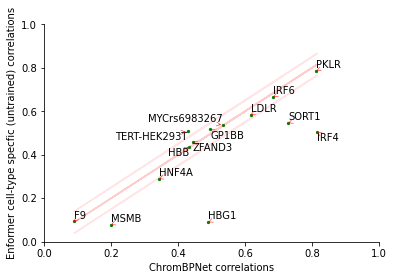

In [63]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sad, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

#plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

In [64]:
dataf.head()

,var.chr_hg19,var.pos_hg19,var.allele1,var.allele2,obs.label,obs.confidence,pred.enformer.variantscore.local_sad,pred.enformer.variantscore.local_sar,pred.chrombpnet.variantscore.logfc,pred.chrombpnet.variantscore.jsd,...,pos_hg19,ref,alt,var.chr_hg38,var.pos_hg38,var.ref_hg38,var.alt_hg38,obs.label_hg38,Confidence_hg38,var.rsid
0,chr6,37775290,G,A,0.03,0.01,-0.021439,-0.025864,-0.184138,-0.041913,...,37775290,G,A,chr6,37807514,G,A,0.03,0.01,"6,37775290,G,A,0.03,0.01,challenge_ZFAND3.tsv"
1,chr6,37775290,G,C,0.03,0.01,-0.013206,-0.015869,-0.115516,-0.033420,...,37775290,G,C,chr6,37807514,G,C,0.03,0.01,"6,37775290,G,C,0.03,0.01,challenge_ZFAND3.tsv"
2,chr6,37775290,G,T,0.07,0.01,-0.022903,-0.027649,-0.138834,-0.049750,...,37775290,G,T,chr6,37807514,G,T,0.07,0.01,"6,37775290,G,T,0.07,0.01,challenge_ZFAND3.tsv"
3,chr6,37775291,T,A,-0.07,0.01,0.005508,0.006592,-0.000805,-0.032182,...,37775291,T,A,chr6,37807515,T,A,-0.07,0.01,"6,37775291,T,A,-0.07,0.01,challenge_ZFAND3.tsv"
4,chr6,37775291,T,C,0.03,0.01,0.028412,0.033691,0.107414,0.042707,...,37775291,T,C,chr6,37807515,T,C,0.03,0.01,"6,37775291,T,C,0.03,0.01,challenge_ZFAND3.tsv"


In [65]:
gt = dataf[["var.chr_hg19", "var.pos_hg19", "var.allele1", "var.allele2","obs.challenge", "obs.label", "obs.condidence"]].drop_duplicates()

for challenge in challenges:
    plt.figure()
    print(challenge)
    gt[gt["obs.challenge"] == challenge]["obs.label"].hist()
    #print(np.max(abs(gt[gt["challenge"] == challenge]["label"])))
    #print(np.median(abs(gt[gt["challenge"] == challenge]["Confidence"])))
    plt.show()
    
"MSMB", "F9", "HNF4A", "SORT1", "IRF6", "IRF4", "PKLR"

"ZFAND3","GP1BB", "MYC", "HBB", "LDLR", "TERT"

KeyError: "['obs.condidence'] not in index"